In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [94]:
directions = {
    (1, 0): 0,  (1, -1): 1, (0, -1): 2, (-1, -1): 3,
    (-1, 0): 4, (-1, 1): 5, (0, 1): 6, (1, 1): 7
}

In [95]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_blur = cv2.GaussianBlur(img_rgb, (7, 7), 5)
    return img, img_rgb, img_blur

In [96]:
def threshold_image(img_blur, threshold_value):
    img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY_INV)
    return img_gray, img_thresh

In [97]:
def find_and_draw_contours(img_gray, img_thresh):
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    img_contour = img_gray.copy()
    cv2.drawContours(img_contour, contours, -1, (255, 0, 0), 2)
    return contours, img_contour

In [98]:
def compute_chain_code_and_corners(contour):
    chain_code = []
    corners = []
    prev_direction = None

    for i in range(1, len(contour)):
        x1, y1 = contour[i-1][0]
        x2, y2 = contour[i][0]
        dx, dy = np.clip(x2 - x1, -1, 1), np.clip(y2 - y1, -1, 1)

        if (dx, dy) in directions:
            direction = directions[(dx, dy)]
            chain_code.append(direction)

            # Detect corners where direction changes significantly
            if prev_direction is not None and prev_direction != direction:
                corners.append((x1, y1))

            prev_direction = direction

    return chain_code, corners

In [99]:
def classify_shape(contour):
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    num_corners = len(approx)
    if num_corners == 3:
        return "Triangle"
    elif num_corners == 4:
        return "Square/Rectangle"
    elif num_corners > 7:
        return "Circle"
    else:
        return "Unknown"

In [100]:
def process_image(image_path, threshold_value):
    img, img_rgb, img_blur = load_and_preprocess_image(image_path)
    img_gray, img_thresh = threshold_image(img_blur, threshold_value)
    contours, img_contour = find_and_draw_contours(img_gray, img_thresh)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(img_rgb), plt.title("Original Image"), plt.axis("off")
    plt.subplot(1, 3, 2), plt.imshow(img_thresh, cmap="gray"), plt.title("Thresholded Image"), plt.axis("off")
    plt.subplot(1, 3, 3), plt.imshow(img_contour, cmap="gray"), plt.title("Contours Detected"), plt.axis("off")
    plt.show()

    print("Number of objects detected:", len(contours))
    for idx, contour in enumerate(contours):
        chain_code, chain_corners = compute_chain_code_and_corners(contour)
        approx_corners = len(cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True))
        
        shape_from_chain = "Unknown"
        if len(chain_corners) == 3:
            shape_from_chain = "Triangle"
        elif len(chain_corners) == 4:
            shape_from_chain = "Square/Rectangle"
        elif len(chain_corners) > 7:
            shape_from_chain = "Circle"

        shape_from_approx = classify_shape(contour)

        print(f"Object {idx+1}:")
        print(f"  Shape (Chain Code)   = {shape_from_chain}, Corners Found = {len(chain_corners)}")
        print(f"  Shape (cv2 Approx)   = {shape_from_approx}, Corners Found = {approx_corners}")
        print(f"  Chain Code Length    = {len(chain_code)}")
        print("-" * 50)


In [101]:
def process_multiple_images(image_thresholds):
    for image_path, threshold_value in image_thresholds.items():
        print(f"Processing: {image_path} with threshold {threshold_value}")
        process_image(image_path, threshold_value)
        print("-" * 50)

Processing: C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\LCA\data\black-square-icon-design-on-white-background-free-vector.jpg with threshold 150


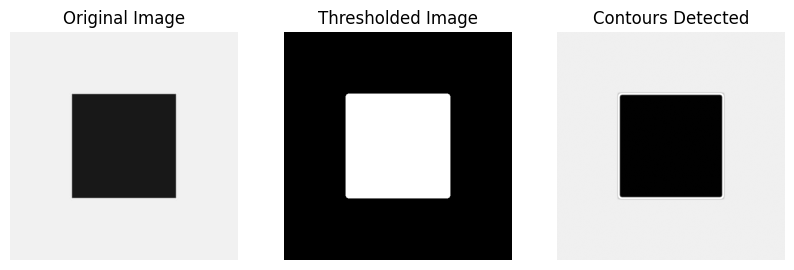

Number of objects detected: 1
Object 1:
  Shape (Chain Code)   = Circle, Corners Found = 23
  Shape (cv2 Approx)   = Square/Rectangle, Corners Found = 4
  Chain Code Length    = 719
--------------------------------------------------
--------------------------------------------------
Processing: C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\LCA\data\bottle_noun_002_04228.jpg with threshold 150


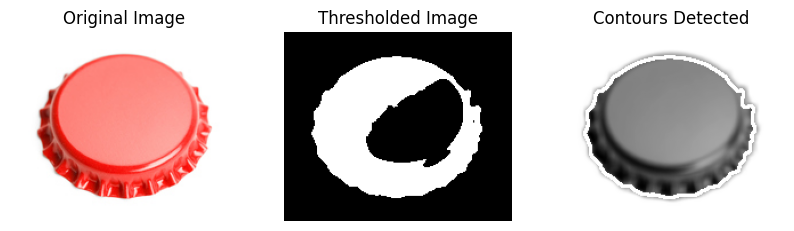

Number of objects detected: 1
Object 1:
  Shape (Chain Code)   = Circle, Corners Found = 196
  Shape (cv2 Approx)   = Circle, Corners Found = 8
  Chain Code Length    = 399
--------------------------------------------------
--------------------------------------------------
Processing: C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\LCA\data\Closed-green-book-mockup-Cover-top-view-Graphics-38934125-1-1-580x387.png with threshold 150


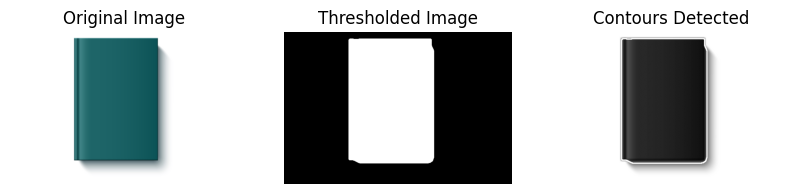

Number of objects detected: 1
Object 1:
  Shape (Chain Code)   = Circle, Corners Found = 54
  Shape (cv2 Approx)   = Square/Rectangle, Corners Found = 4
  Chain Code Length    = 1034
--------------------------------------------------
--------------------------------------------------


In [102]:
image1_path = r'C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\LCA\data\black-square-icon-design-on-white-background-free-vector.jpg'
image2_path = r'C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\LCA\data\bottle_noun_002_04228.jpg'
image3_path = r'C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\LCA\data\Closed-green-book-mockup-Cover-top-view-Graphics-38934125-1-1-580x387.png'

process_multiple_images({
image1_path: 150,
image2_path: 150,   
image3_path: 150,   
# '/content/bottle_noun_002_04228.jpg': 200,
    # '/content/Closed-green-book-mockup-Cover-top-view-Graphics-38934125-1-1-580x387.png':150
})